# Library Imports

In [27]:
from math import sqrt, sin, cos, pow, pi
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [28]:
# import matplotlib.pyplot as plt
# #%matplotlib widget
# import numpy as np

# # enable interactive mode
# plt.ion()

# # create some random data
# x = np.random.rand(100)
# y = np.random.rand(100)

# # create the plot
# fig, ax = plt.subplots()
# sc = ax.scatter(x, y)

# # update the plot
# for i in range(10):
#     x = np.random.rand(100)
#     y = np.random.rand(100)
#     sc.set_offsets(np.column_stack([x, y]))
#     fig.canvas.draw_idle()
#     plt.pause(0.5)

# # show the plot and start the event loop
# plt.show()


# System Check 

## Checking GPU if it's present

In [57]:
import torch
# Check if CUDA is available and select the GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Define the size of the matrices
size = 100

# Create two random matrices on the GPU
a = torch.randn(size, size, device=device)
b = torch.randn(size, size, device=device)

# Multiply the matrices on the GPU
c = torch.mm(a, b)

# Transfer the result back to the CPU and print it
print(c.cpu())

tensor([[ 16.0555,  -3.0833,   0.4775,  ...,  11.6258,  10.1368,   1.3323],
        [ 10.8757,   9.5370,   4.0662,  ..., -16.3672,  -1.6611,  -8.2979],
        [-13.8016,  -8.4729,  12.5702,  ...,  -9.2682,   1.6575,   3.3300],
        ...,
        [ -3.8794,  -2.3881,   1.2910,  ...,   3.9746,   0.4318,  -7.5166],
        [ 11.2517, -19.9798, -15.4580,  ...,   8.0457,  19.0498,  -0.1145],
        [-14.0748,   2.6676,  -8.1465,  ...,  -5.0182,   4.1756,  -5.8127]])


# Lecture 1

## Simple Harmonic Oscillator 
- We use a mathematical model, of a simple harmonic oscillator.
- The aim is to see the use of Gradient Descent for the model driven approach.
- We know a original equation of SHO whose position at any instant is given by ACos(thet*t)+BSin(thet*t) where A = 1.4030, B = 5.0411, thet = 1/sqrt(m) for m = 1.
- Via our mathematical model, we only will give it initial A_ini = 1.4030, B_ini = 5.0411, m_ini = 1.5 and use gradient descent wrt thet, on our general equation ACos(thet*t)+BSin(thet*t) to see does it approximate the m very well near to 1 and also remember that A & B stays to it's initial values only.

### Basics of Gradient Descent
- In each iteration of gradient descent, we compute the gradient of the loss function with respect to the parameters.
- Then update the parameters by subtracting the product of the gradient and the step size. 
- We repeat this process for a fixed number of steps or until convergence is achieved. 
- After updating the parameters, we can use them to make a prediction for the output variable.
- So we have 2 loops, one to make predictions and one to take gradient descent steps.

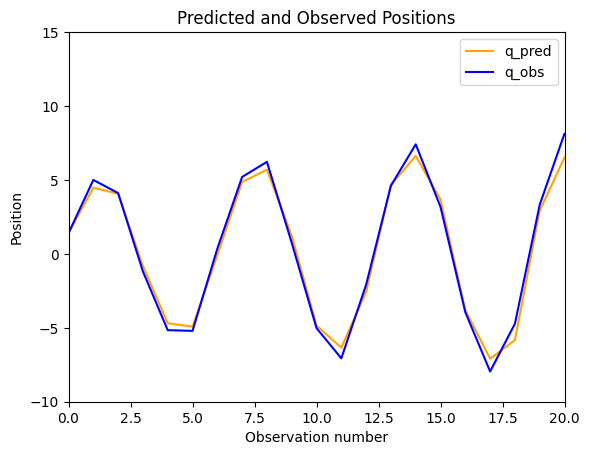

array([ 0.39903625,  0.28351448, -0.96369157])

In [23]:
import numpy as np
from math import cos, sin, sqrt
import matplotlib.pyplot as plt

def SHO(ini, alpha, N, m_original, steps):
    A, B, m = ini # initial values for the parameters A, B, and m
    theta = 1/sqrt(m) # calculate the initial value of theta from m
    theta_original = 1/sqrt(m_original) # calculate the original value of theta from the original mass
    step_size = alpha # set the step size for gradient descent
    A_ori, B_ori = A,B
    q_pred_list = [] # initialize list to store predicted positions
    q_obs_list = [] # initialize list to store observed positions

    for t in range(0,N):
        # calculate the observed position of the particle using the current values of A, B, and theta
        q_obs = A*cos(theta_original*t) + B*sin(theta_original*t)
        q_obs_list.append(q_obs)

        for i in range(0,steps): # perform gradient descent for a fixed number of steps
            X_ini = np.array([A,B,theta]).T # create an initial array for the parameters

            # calculate the gradients for A, B, and theta using the current values of them.
            A_grad = A*pow(cos(theta*t),2) + B*sin(theta*t)*cos(theta*t) - q_obs*cos(theta*t)
            B_grad = B*pow(sin(theta*t),2) + A*sin(theta*t)*cos(theta*t) - q_obs*sin(theta*t)
            theta_grad = A*t*sin(theta*t)*(q_obs + A*cos(theta*t) - sin(theta*t)) + B*t*cos(theta*t)*(B*sin(theta*t) + cos(theta*t) - q_obs)
            
            
            grad = np.array([A_grad, B_grad, theta_grad]).T # create an array for the gradients that is the total change of A,B,Theta at X_ini
            # Now we don't again multiply grad with X_ini, grad is itself the gradient at X-ini 
            ## Not sure on this part of updating the X_new....

            # update the parameters using gradient descent
            X_new = X_ini - step_size * grad
            A, B, theta = X_new # update A, B, and theta based on the new values

        #m_final = 1/pow(theta, 2) # calculate the final mass using the final value of theta
        q_pred = A*cos(theta*t) + B*sin(theta*t) # predict the position of the particle at t=1
        q_pred_list.append(q_pred)

    # plot the predicted and observed positions
    t_list = list(range(N))
    plt.plot(t_list, q_pred_list, color='orange', label='q_pred')
    plt.plot(t_list, q_obs_list, color='blue', label='q_obs')
    #plt.xlim(0,20)
    #plt.ylim(-10,15)
    plt.xlabel('Observation number')
    plt.ylabel('Position')
    plt.title('Predicted and Observed Positions')
    plt.legend()
    plt.show()

    return X_new

# set the initial values for A, B, and m
A = 1.4030
B = 5.0411
m = 1.5

# set the hyperparameters for the function
N = 200 # number of times to make predictions
steps = 10000 # number of gradient descent steps to take
alpha = 0.0001 # step size for gradient descent

# call the SHO function with the initial values and hyperparameters
SHO([A, B, m], alpha, N, m_original=1, steps=steps)

``` {python}
# Self notes code
def SHO(ini,alpha,N,m_original,steps):
    A, B, m = ini
    theta = 1/sqrt(m)
    theta_original = 1/sqrt(m_original)
    step_size = alpha
    
    for t in range(0,N):
        # This q_obs gives observed particle positions.
        q_obs = A*cos(theta_original*t)+B*sin(theta_original*t) # I am allowing the use of new A,B for letting the change across A, B happen in both q_obs and q_model, so that I can have final mass at the end.
        print(f"Observation {t+1}: q_obs={q_obs}")
        
        for i in range(0,steps): # Performing 1k grad steps before making a prediction.
            # theta = 1/sqrt(m) # not required cause we get it from X_new
            X_ini = np.array(A,B,theta).T

            # Calculating the gradient descent cf's
            A_grad = A*pow(cos(theta*t),2)+B*(sin(theta*t))*(cos(theta*t))-q_obs*cos(theta*t)
            B_grad = B*pow(sin(theta*t),2)+A*(sin(theta*t))*(cos(theta*t))-q_obs*sin(theta*t)
            theta_grad = A*t*sin(theta*t)*(q_obs + A*cos(theta*t)-sin(theta*t))+B*t*cos(theta*t)*(B*sin(theta*t)+cos(theta*t)-q_obs)
            
            # GD array
            grad = np.array(A_grad,B_grad,theta_grad).T
            
            # Updating the parameters using the GD array
            X_new = X_ini - step_size*grad*X_ini
            A,B,theta = X_new

            #q = q_ini - alpha*grad*(q_ini) not required cause we are not updating the position of particle directly, but via gradients we are simply updating the parameters.
            # m_new = (-1*q)/(-1*(1/m)*q)#updating the mass, A & B are kept as it is, basically it's taking new points position and dividing it by acceleration at that point, and to calculate accelration we are using old mass. # not required by as we use gradient and get mass from X_new directly.
            #q_ini = q # Updating the new q_ini not required.
            
        m_final = 1/pow(theta,2)
        q_pred = A*cos(theta*1)+B*sin(theta*1)
        print(f"Prediction {t+1}: m={m_final}, q_pred={q_pred}")
    return m_final

m_original = 1 # This is a fixed parameter
A = 1.4030 # The parameters whose value is going to be changed
B = 5.0411 # The parameters whose value is going to be changed
m = 1.5 # The parameters whose value is going to be changed

N = 10 # total times q_predictions is to be produced, basically a hyper-parameter, upto when we want to allow gradient descent to happen, with how many steps.
steps = 1000 # Total number of gradient descent steps to take. # Hyper-parameter
alpha = 0.01 # step size. # Hyper-parameter.
SHO([A,B,m],alpha,N,m_original,steps)
```

# Lecture 2

### Lorrenz 63 Plot with gt
- Here we are trying to model a Lorrenz 63, via a surrogate physical process.
- To build this surrogate process, we need to know how many states are there in Lorrenz 63, there are 3.
- Once we know the state variable, i.e. Z has 3 dimensions, we build a field vector and non-autonomous forcing term gt of the same dimensions.
- The f_z acts on the current state pts and forcing function gt (changes as per the model or DA algo) which is time dependent function is added to to fz.
- This linear combination is multiplied with the step size dt or alpha and added to Z_ini to get a new set of points.
- Finally we have a new coordinate from our surrogate physical process following the Lorrenz 63 process.
- I have run it in 2 ways, one using normal numpy vectors and then with torch vectors, I am using these vectors since they use broadcasting.

In [47]:
def plot_maker(Z_ini, dt, t):
    iterations = int(t/dt)
    x, y, z = Z_ini
    X_cord = np.array([x,])
    Y_cord = np.array([y,])
    Z_cord = np.array([z,])
    
    sig = 10
    ro = 28
    bet = 8/3
    a = 1/np.sqrt(dt)
    g1 = a*(1/np.sqrt(2) - 1/2)
    g2 = a*(1/np.sqrt(3) - 1/2)
    g3 = a*(1/np.sqrt(5) - 1/2)
    gt = np.array([g1, g2, g3])
    f_z = np.array([sig*(y-x), x*(ro-z)-y, x*y-bet*z])
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111, projection='3d')
    #ax.scatter(x,y,z, c='blue', alpha=0.05)
    ax.plot([x],[y],[z], color = 'blue', lw = 0.6)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(-30,30)
    ax.set_ylim(-30,30)
    ax.set_zlim(0,50)
    for i in range(iterations):
        Z_new = Z_ini + dt*(f_z + gt)
        gt = np.array([1.99999*g + a/2 if g >= -a/2 and g < 0 else -1.99999*g + a/2 for g in gt])
        x, y, z = Z_new
        X_cord = np.append(X_cord,x)
        Y_cord = np.append(Y_cord,y)
        Z_cord = np.append(Z_cord,z)
        f_z = np.array([sig*(y-x), x*(ro-z)-y, x*y-bet*z])
        #ax.scatter(x,y,z, color='blue', alpha = 0.05) # To simply plot pts in same color.
        #ax.plot([Z_ini[0], x], [Z_ini[1], y], [Z_ini[2], z], color='blue', lw=1.5) # To create a small line among the pts.
        Z_ini = Z_new
    ax.plot(Y_cord,X_cord,Z_cord)
    plt.show()

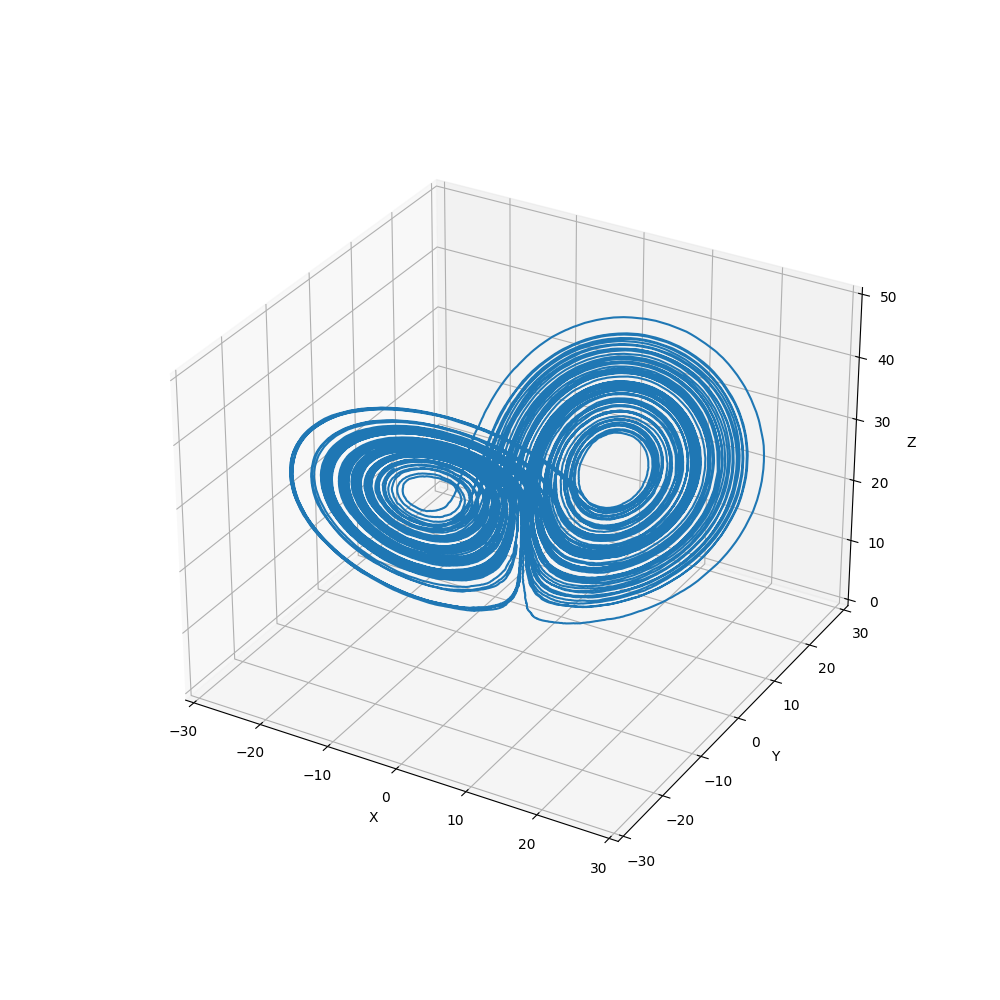

In [48]:
# The scatter plot
X_cord = [-0.587,]
Y_cord = [-0.563,]
Z_cord = [16.780,]
Z_ini = np.array([-0.587,-0.563,16.870])
dt = 0.001
t = 100
plot_maker(Z_ini,dt,t)

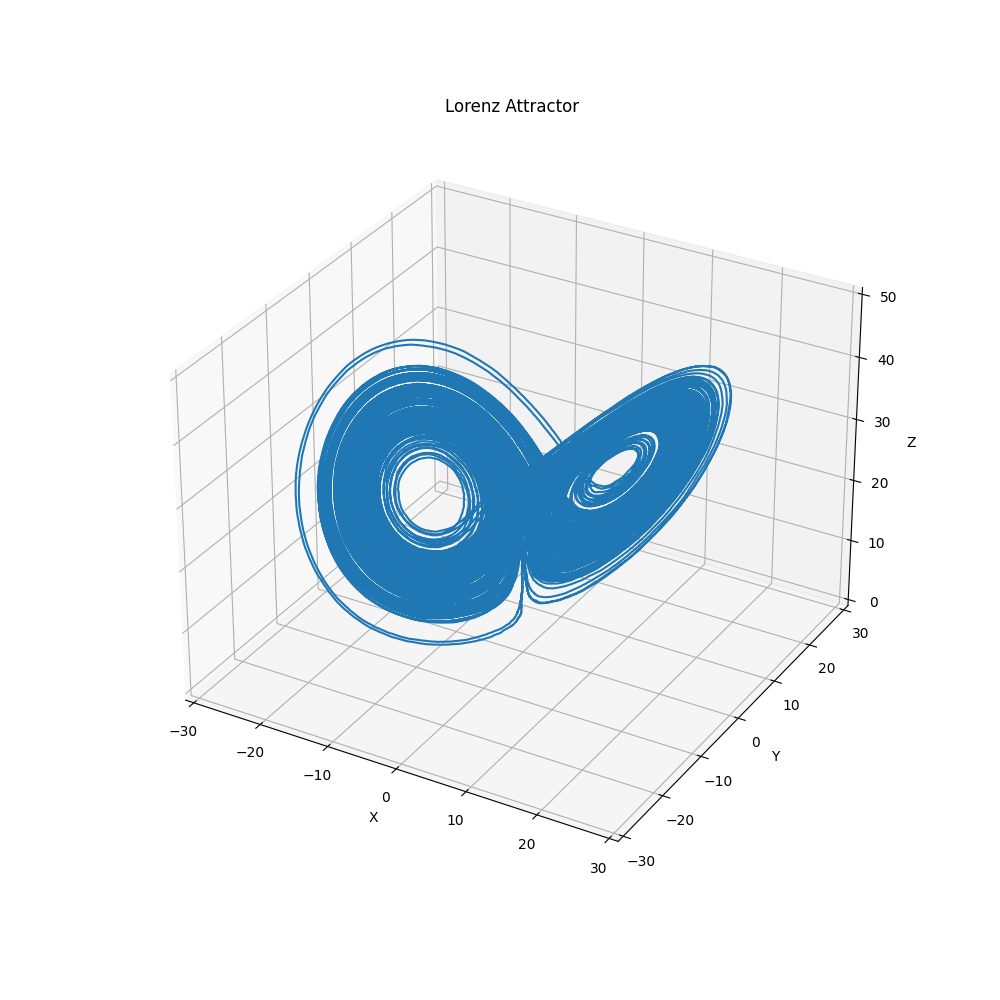

In [49]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def lorenz_attractor(Z_ini, dt, t):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    iterations = int(t/dt)
    sig = 10
    ro = 28
    bet = 8/3
    X_cord, Y_cord, Z_cord = [], [], []
    a = 1/torch.sqrt(torch.tensor(dt, dtype=torch.float32, device=device))
    gt = torch.tensor([a*(1/torch.sqrt(torch.tensor(2, dtype=torch.float32, device=device)) - 1/2), 
                       a*(1/torch.sqrt(torch.tensor(3, dtype=torch.float32, device=device)) - 1/2), 
                       a*(1/torch.sqrt(torch.tensor(5, dtype=torch.float32, device=device)) - 1/2)], 
                      dtype=torch.float32, device=device)
    f_z = torch.tensor([sig*(Z_ini[1]-Z_ini[0]), Z_ini[0]*(ro-Z_ini[2])-Z_ini[1], Z_ini[0]*Z_ini[1]-bet*Z_ini[2]], 
                       dtype=torch.float32, device=device)
    Z_new = torch.tensor(Z_ini, dtype=torch.float32, device=device)
    
    for i in range(iterations):
        Z_new = Z_new + dt*(f_z + gt) # get new Z co-ordinates by using Z-ini, vector field applied at Z_ini and initial force
        # Plotting these co-ordinates:
        gt = torch.where((gt >= -a/2) & (gt < 0), 2*gt+a/2, -2*gt+a/2) # update the force
        X_cord.append(Z_new[0].item())
        Y_cord.append(Z_new[1].item())
        Z_cord.append(Z_new[2].item())
        f_z = torch.tensor([sig*(Z_new[1]-Z_new[0]), Z_new[0]*(ro-Z_new[2])-Z_new[1], Z_new[0]*Z_new[1]-bet*Z_new[2]], 
                           dtype=torch.float32, device=device) # update the vector field
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(X_cord, Y_cord, Z_cord)
    ax.set_title('Lorenz Attractor')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(-30,30)
    ax.set_ylim(-30,30)
    ax.set_zlim(0,50)
    plt.show()

Z_ini = [-0.587,-0.563,16.870]
dt = 0.001
t = 200
lorenz_attractor(Z_ini, dt, t)

### Notes from ex 8

- 1.4 This process is an example of so-called Ornstein-Uhlenbeck process. It converts any (complicated) distribution µ of X0 into a certain distribution you would find in step 3. Suppose you can run this process reverse-in-time, and then what you can do with this?
    - Here distribution of X0 is just a constant distribution with Value of x_0 = 2, so we convert this distribution to a normal distribution, by use of the stochastic component of the $\xi$ which is nothing but a random variable following a normal distribution. ystem.

- The Ornstein-Uhlenbeck process is a stochastic process that describes the evolution of a particle undergoing Brownian motion with a mean-reverting behavior.
- In the equation xn+1 = xn - xn∆t + √(2∆t) ξn, the term xn - xn∆t represents the mean-reverting component, while the term √(2∆t) ξn represents the random fluctuation or noise. - If you could run this process in reverse-in-time, it would allow you to generate samples from a distribution that converges to the distribution observed in step 3. Specifically, starting from the distribution at time t = 10, you could simulate the process backward to obtain samples from the distribution at earlier times, such as t = 1, t = 0.5, and t = 0 .
- This reverse simulation can be useful in various scenarios. For example, if you have observed the final distribution at a particular time and want to understand how the system evolved over time to reach that distribution, you can use the reverse-in-time simulation to trace back the possible paths and distributions at earlier times. In summary, running the Ornstein-Uhlenbeck process in reverse-in-time allows you to obtain samples from the distributions observed at earlier times, providing insights into the dynamics and evolution of the system.